In [1]:
import tensorflow as tf
import numpy as np
import cv2
import glob

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    # 프로그램 시작시에 메모리 증가가 설정되어야만 합니다
    print(e)

In [3]:
model = tf.keras.models.load_model('결막염_DenseNet121.h5')

In [18]:
mother_dir = '2.Validation\라벨링데이터\고양이\안구\일반\비궤양성각막염'
label_dict = {'무': 0, '유': 1}
data_0 = glob.glob(mother_dir + '/무/*.jpg')
data_1 = glob.glob(mother_dir + '/유/*.jpg')
len(data_0), len(data_1)

(151, 155)

In [19]:
from random import sample
n_sample = 100
zero = sample(data_0, n_sample)
one = sample(data_1, n_sample)
# two = sample(data_2, n_sample)
# three = sample(data_3, n_sample)
valid = zero + one #+ two + three

In [20]:
from PIL import Image
x_valid = []
y_valid = [0] * n_sample + [1] * n_sample #+ [2] * n_sample + [3] * n_sample
for i in valid:
    img = Image.open(i)
    img = img.convert('RGB')
    img = img.resize((224,224))
    img = np.array(img)
    x_valid.append(img)
    
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)

In [21]:
model.evaluate(x_valid,y_valid)

7/7 [==============================] - 0s 44ms/step - loss: 3.0878 - accuracy: 0.6400 - FN: 2.0000


[3.0877950191497803, 0.6399999856948853, 2.0]

In [22]:
y_predict = np.round(model.predict(x_valid))

<function matplotlib.pyplot.show(close=None, block=None)>

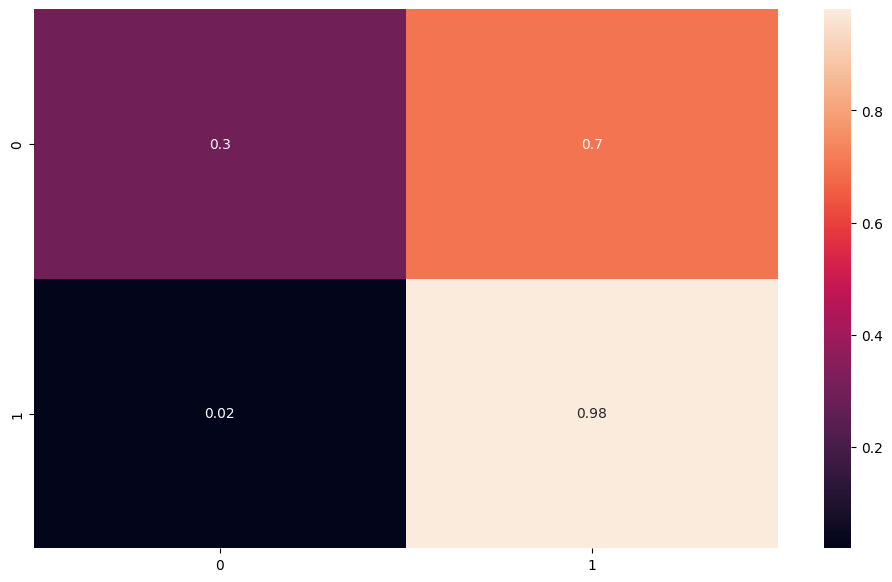

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# x_0은 label == 0인 데이터, x_1은 label == 1인 데이터만 모은 것
cf_matrix = confusion_matrix(y_valid, y_predict) / np.array([n_sample]).reshape(-1,1)

plt.figure(figsize = (12,7))
sns.heatmap(cf_matrix, annot=True)
plt.show